# Feature Selection

### Imports

In [1]:
import os
import sys
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(os.path.dirname((os.path.abspath(""))))

In [2]:
from src.pipeline import Pipeline

[nltk_data] Downloading package punkt to /Users/tim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/tim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/tim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tim/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
pipeline = Pipeline(
    collection='data/processed/20_200_0_collection.pkl',
    queries='data/processed/20_200_0_queries.pkl',
    queries_val='data/processed/20_200_0_queries_val.pkl',
    queries_test='data/processed/20_200_0_queries_test.pkl',
    features='data/processed/20_200_0_features.pkl',
    qrels_val='data/processed/20_200_0_qrels_val.pkl',
    qrels_test='data/processed/20_200_0_qrels_test.pkl',
    features_test='data/processed/20_200_0_features_test.pkl',
    features_val='data/processed/20_200_0_features_val.pkl',
)

In [4]:
pipeline.features

,qID,pID,y,w2v_cosine,w2v_euclidean,w2v_manhattan,tfidf_cosine,tfidf_euclidean,tfidf_manhattan,bert_cosine,...,polarity_doc,subjectivity_query,polarity_query,bm25,doc_nouns,doc_adjectives,doc_verbs,query_nouns,query_adjectives,query_verbs
0,603195,7050012,1,0.994196,65.315483,521.174474,0.496043,1.003949,4.459553,0.899372,...,0.000000,0.00,0.0,-24.910609,23,6,4,3,1,1
1,474183,325505,1,0.996240,70.790733,567.267506,0.740712,0.720123,2.745917,0.880772,...,0.450000,0.00,0.0,-32.867280,18,9,3,4,0,0
2,320545,1751825,1,0.945538,42.384514,345.523735,0.462614,1.036712,3.490260,0.582573,...,0.500000,0.20,0.2,-19.845336,20,2,14,2,1,1
3,89798,5069949,1,0.983225,86.804070,682.813968,0.528376,0.971209,5.262610,0.731121,...,0.066667,0.25,0.0,-27.252681,25,10,5,3,1,0
4,1054603,2869106,1,0.986374,76.179581,607.961182,0.447341,1.051341,5.015437,0.774794,...,0.000000,0.00,0.0,-28.400534,20,9,6,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1165107,2078953,0,0.987960,68.098122,541.248789,0.453662,1.045312,4.689901,0.482285,...,0.113333,0.00,0.0,-10.566152,14,7,5,1,0,2
196,309227,718432,0,0.922373,43.735497,350.974023,0.706138,0.766632,2.630957,0.506990,...,0.362500,0.20,0.2,-19.352811,14,8,10,3,1,1
197,594675,2996694,0,0.923053,37.689041,299.969996,0.247049,1.227152,3.557621,0.275192,...,0.125000,0.00,0.0,-10.200606,15,6,6,1,1,1
198,905486,7669113,0,0.993062,37.770847,306.176907,0.649830,0.836863,3.417697,0.554341,...,0.150000,0.00,0.0,-28.045122,7,7,6,2,1,2


### Correlation Matrix
#### Pearson correlation

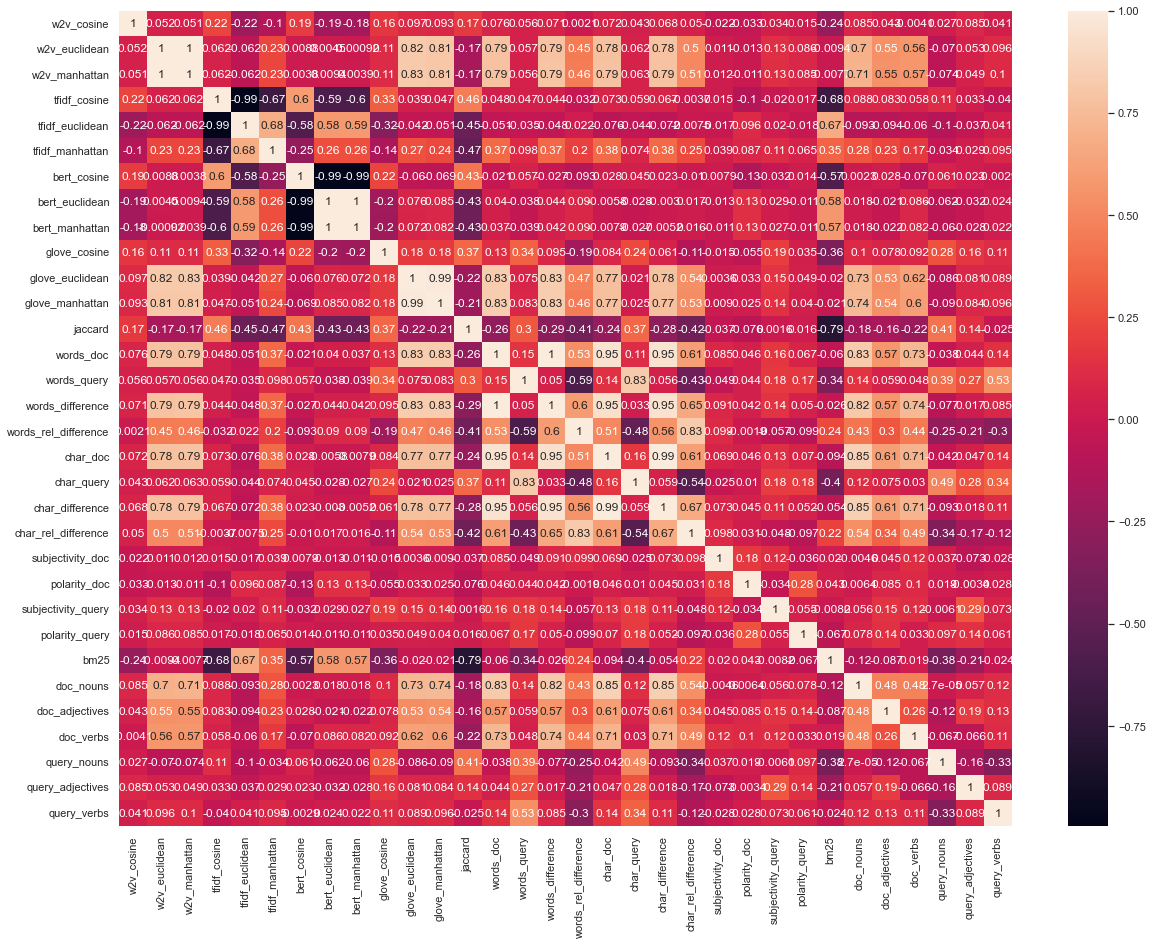

In [8]:
corr = pipeline.features.drop(columns=['qID', 'pID', 'y']).corr(method="pearson")
sn.set(rc = {'figure.figsize':(20,15)})
sn.heatmap(corr, annot=True)
plt.show()

#### Spearman correlation

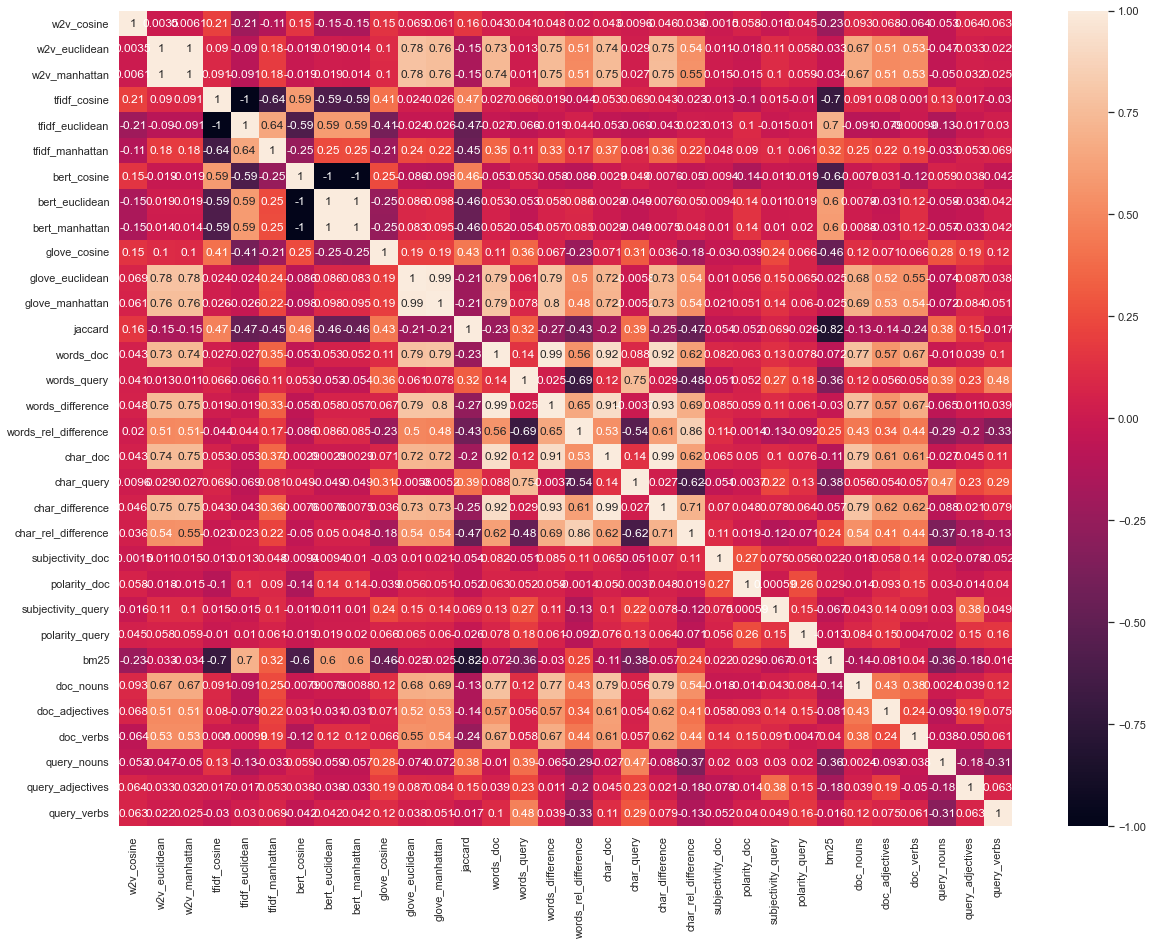

In [9]:
corr2 = pipeline.features.drop(columns=['qID', 'pID', 'y']).corr(method="spearman")
sn.set(rc = {'figure.figsize':(20,15)})
sn.heatmap(corr2, annot=True)
plt.show()

### Plots of the correlation to y
#### Pearson correlation

<AxesSubplot:>

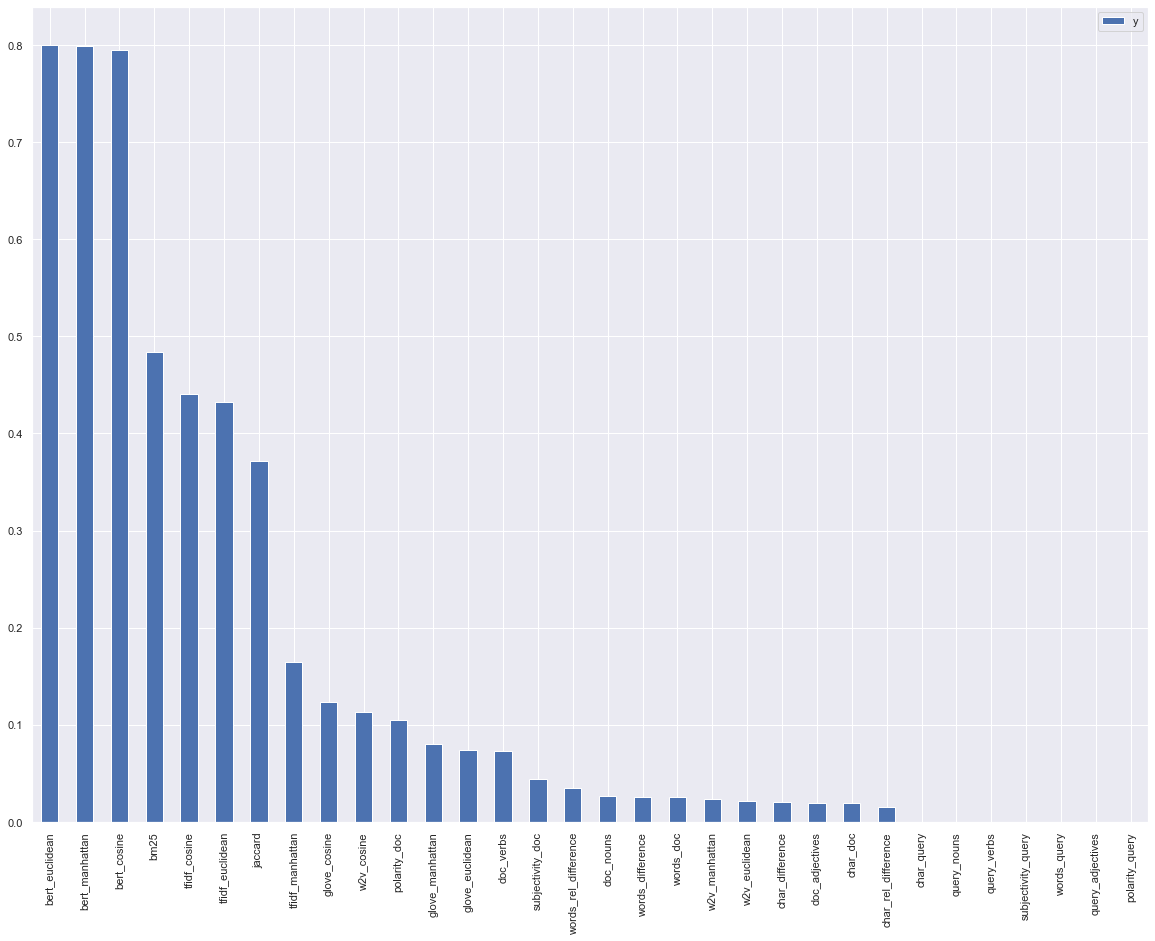

In [10]:
corr_y = abs(pipeline.features.drop(columns=['qID', 'pID']).corr(method="pearson")["y"])
highest_corr = pd.DataFrame(corr_y)
highest_corr.drop(['y'], inplace=True)
highest_corr.sort_values('y',  ascending=False, inplace=True)
highest_corr.plot(kind='bar')

#### Spearman correlation

<AxesSubplot:>

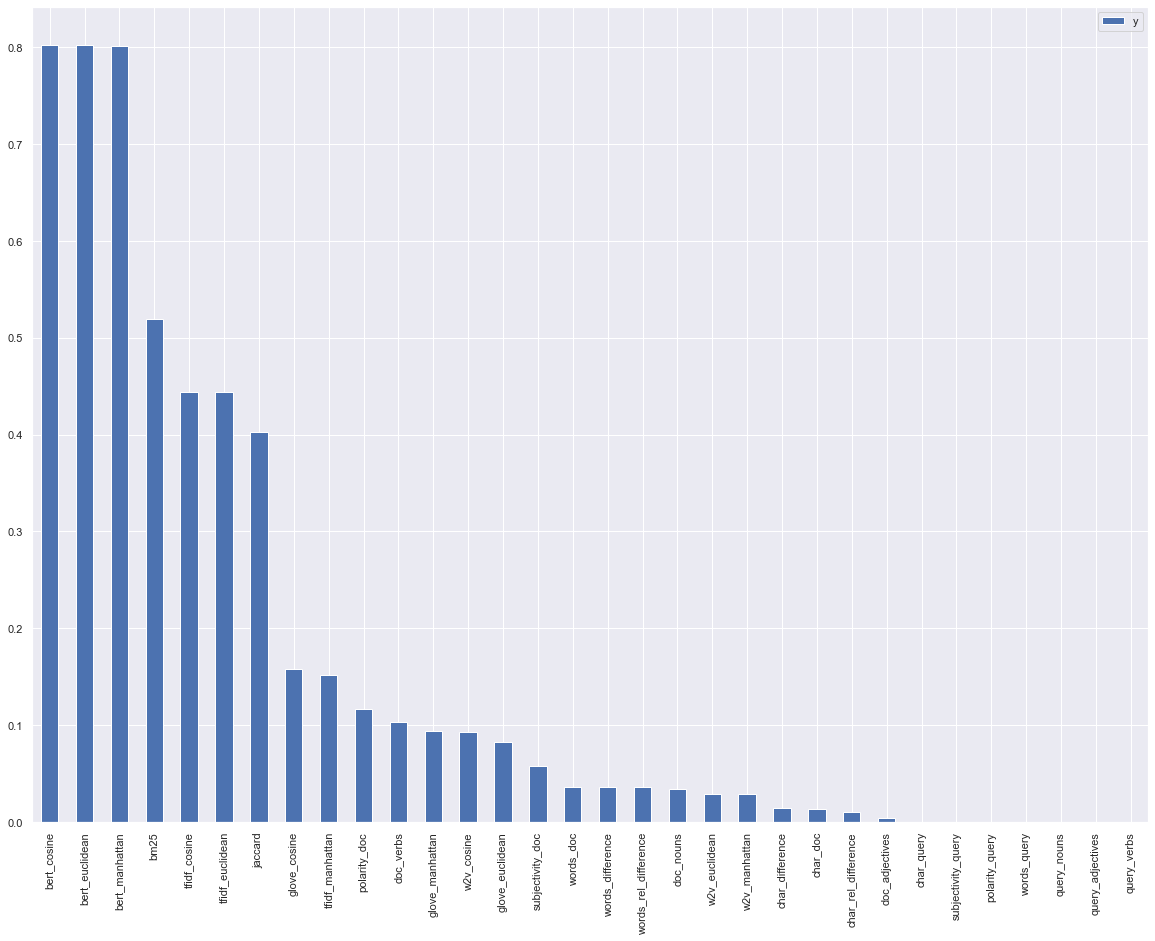

In [11]:
corr_y_2 = abs(pipeline.features.drop(columns=['qID', 'pID']).corr(method="spearman")["y"])
highest_corr2 = pd.DataFrame(corr_y_2)
highest_corr2.drop(['y'], inplace=True)
highest_corr2.sort_values('y',  ascending=False, inplace=True)
highest_corr2.plot(kind='bar')

### Forward Selection

In [12]:
from skopt.space import Integer
from skopt.space import Real
from skopt.space import Categorical

logistic_regression_search_space: list = []
logistic_regression_search_space.append(Categorical(['l2', 'none'], name='penalty'))
logistic_regression_search_space.append(Real(0.1, 100.0, name='C'))
logistic_regression_search_space.append(Real(1e-6, 0.1, name='tol'))

In [13]:
pipeline.forward_selection('lr', 0, logistic_regression_search_space)

C:\Users\Admin\anaconda3\envs\InRe\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65340/65340 [01:00<00:00, 1078.26it/s]
C:\Users\Admin\anaconda3\envs\InRe\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65340/65340 [00:56<00:00, 1156.84it/s]
C:\Users\Admin\anaconda3\envs\InRe\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.

Testing features: ['w2v_cosine']


C:\Users\Admin\anaconda3\envs\InRe\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Admin\anaconda3\envs\InRe\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Admin\anaconda3\envs\InRe\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Admin\anaconda3\envs\InRe\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Admin\anaconda3\envs\InRe\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Admin\anaconda3\envs\InRe\lib\site-packages\sklearn

Best MRR: 5.5226725892252336e-05
Best Hyperparameters: ['none', 73.22730314542193, 0.037251339778251895]


TypeError: 'LogisticRegression' object is not callable